## Descriptive Analysis of Netflix dataset
Source: Kaggle, Size: (7787, 12)

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff
from scipy.stats import norm
from sklearn.preprocessing import MultiLabelBinarizer 
from wordcloud import WordCloud
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset and view
df = pd.read_csv('./netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Observations:
- There are 7787 titles with 12 columns related to each title:
    - show_id - unique id of the title
    - type - type of the title [TV Show, Movie]
    - title - title name
    - director - director of the movie
    - cast - Leads of the title
    - country - Country of origin
    - date_added - date on which the title was added to Netflix
    - release_year - year of release.
    - rating - TV-rating
    - duration - Runtime of the title (in minutes or seasons)
    - listed_in - Genre
    - description - short summary of the title
- The durations attribute has inconsistent units in terms of no. of seasons or minutes, so we can accordingly have 2 separate attributes
- To analyze the trends in content being added, we can split the date_added column into date, month, year columns

In [3]:
df['season_count'] = df.apply(lambda x : int(x['duration'].split(" ")[0]) if "Season" in x['duration'] else "", axis = 1)
df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration']else "", axis = 1)
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

### 1. Trend in content added over the years
#### Observations:
- The growth in number of movies on netflix is much higher than that of TV shows
- The growth in content started from 2013. As expected 2020 shows a dip

In [4]:
d1 = df[df["type"] == "TV Show"]
d2 = df[df["type"] == "Movie"]

col = "year_added"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#6ad49b"))
data = [trace1, trace2]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

### 2. Trend in content added through the year
#### Observations:
- December records the highest content release, maybe due to higher viewership with vacations worldwide
- February has the least

In [5]:
col = 'month_added'
vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#a678de"))
data = [trace1]
layout = go.Layout(title="Monthly content growth trend", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

### 3. Content composition
#### Observations:
- Movies make up more than 2/3rd of the content

In [6]:
net_category=df['type'].value_counts().to_frame().reset_index().rename(columns={'index':'type','type':'count'})
fig = go.Figure([go.Pie(labels=net_category['type'], values=net_category['count'])])
fig=fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=15,insidetextorientation='radial')
fig=fig.update_layout(title="Netflix Show Types",title_x=0.5)
fig.show()

### 4. Countries adding content
#### Observations:
- US provides the highest number of Movies & Tv Shows, at 2nd place is India

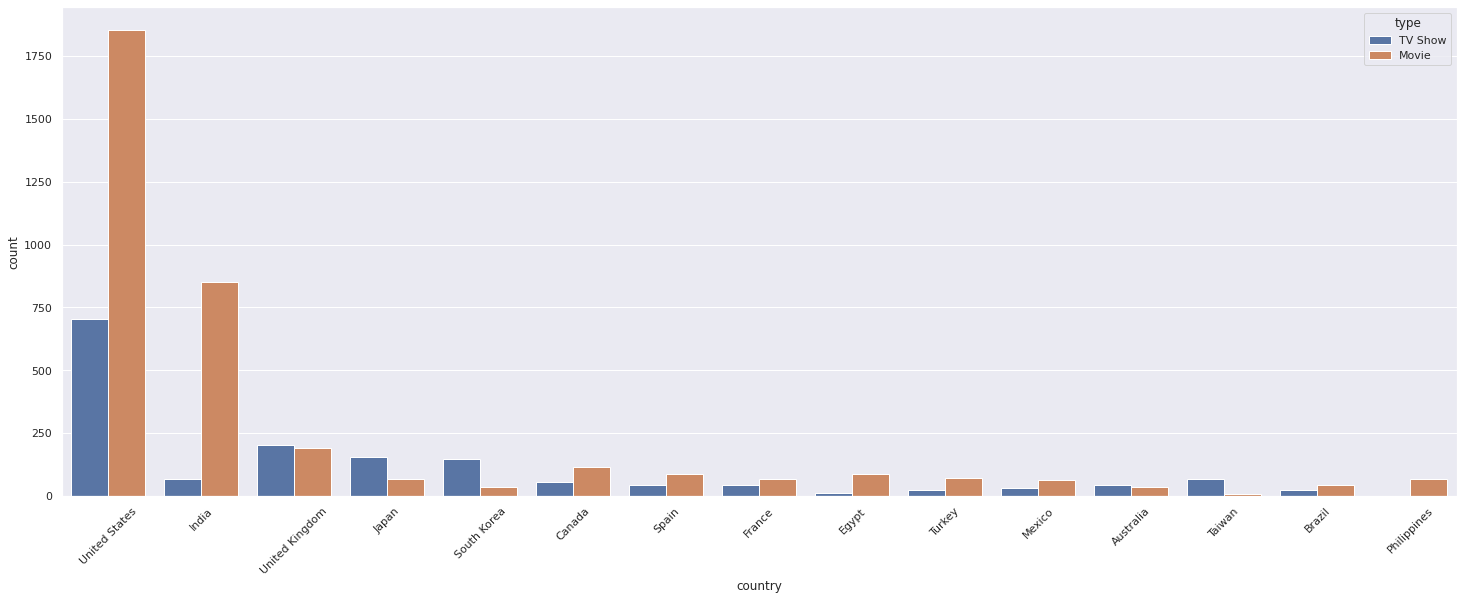

In [7]:
sns.set()
plt.figure(figsize=(25,9))
sns.countplot(x="country",data= df,hue= "type",order = df['country'].value_counts().index[0:15])
plt.xticks(rotation=45)
plt.show()

### 5. Rating distribution
#### Observations:
- Highest content is given TV-MA (unsuited for U-17 age) then TV-14 (unsuited for U-14 age) ratings
- TV shows are relatively more suited for children

In [8]:
col = "rating"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#a678de"))
trace2 = go.Bar(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#6ad49b"))
data = [trace1, trace2]
layout = go.Layout(title="Content rating", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

### 6. Distribution of Movie Duration
#### Observations:
- Normal distribution likely followed
- Form the plot below we see almost 95% of the movies have a duration ranging from 70 min to 130 min.

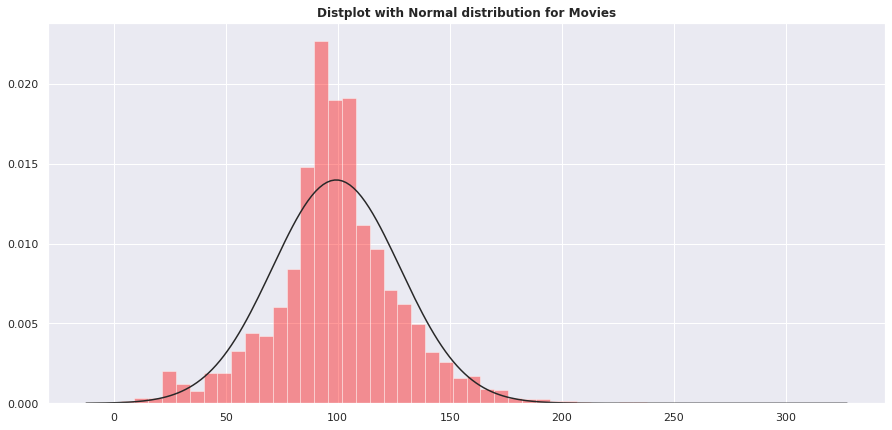

In [9]:
plt.figure(figsize=(15,7))
sns.distplot(df['duration'].str.extract('(\d+)'),fit=norm,kde=False,color=['red'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
plt.show()

### 7. Genre Correlations among movies
#### Observations:
- Negative relationship between drama and documentary
- There are many dramas for independent and international films.

There are 42 types


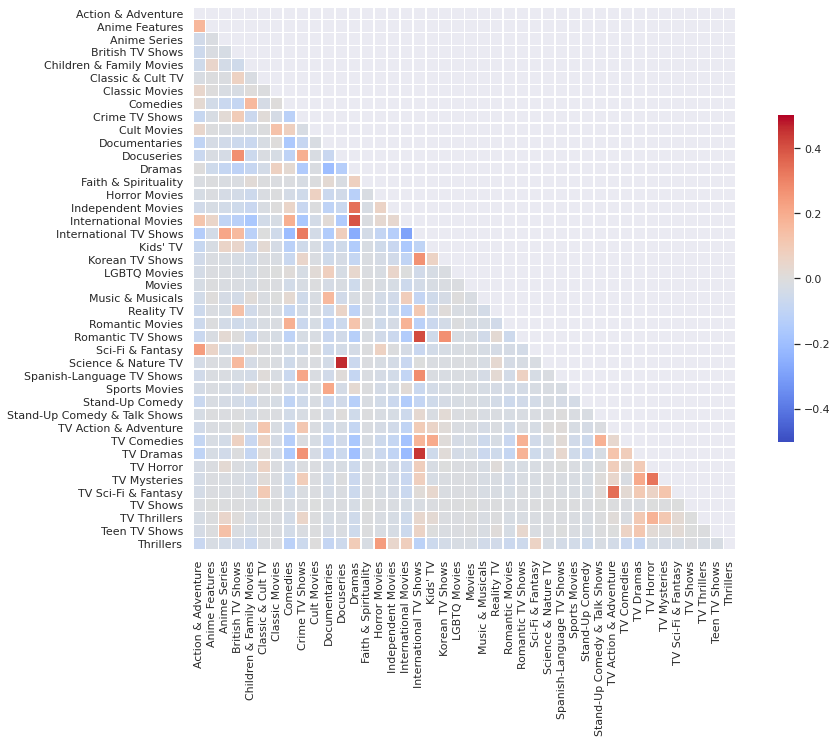

In [10]:
def relation_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    Types = []
    for i in df['genre']: Types += i
    Types = set(Types)
    print("There are {} types".format(len(Types),title))    
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(15, 10))
    pl = sns.heatmap(corr, mask=mask, cmap= "coolwarm", vmax=.5, vmin=-.5, center=0, square=True, linewidths=.7,
                     cbar_kws={"shrink": 0.6})
    plt.show()
relation_heatmap(df, 'Movie')

### 8. Title famous word cloud
### Observations:
- Most titles have the words love, story, life etc in them

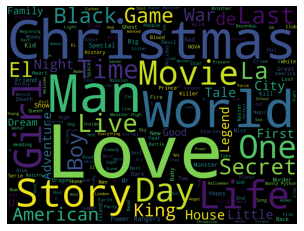

In [11]:
wordcloud = WordCloud(background_color='Black', width=4000,height=3000).generate(" ".join(df.title))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### 9. Summary Statistics

In [12]:
print(f"Mean ssn count: {df[df['season_count']!='']['season_count'].mean()}")
print(f"Median ssn count: {df[df['season_count']!='']['season_count'].median()}")
print(f"Mean duration count = 100 min")

Mean ssn count: 1.7759336099585061
Median ssn count: 1.0
Mean duration count = 100 min


### Observations:
- 2019 records highest show content addition
- 2017 represent 50% content